In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd
from scipy import stats

In [77]:
data_url = 'https://raw.githubusercontent.com/PramodShenoy/911-Calls/master/911.csv'

data = pd.read_csv(data_url)

In [78]:
data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [80]:
data.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [81]:
data = data[['timeStamp']]

data['timeStamp'] = pd.to_datetime(data['timeStamp'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12248\3934315152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['timeStamp'] = pd.to_datetime(data['timeStamp'])


In [82]:
data

,timeStamp
0,2015-12-10 17:40:00
1,2015-12-10 17:40:00
2,2015-12-10 17:40:00
3,2015-12-10 17:40:01
4,2015-12-10 17:40:01
...,...
99487,2016-08-24 11:06:00
99488,2016-08-24 11:07:02
99489,2016-08-24 11:12:00
99490,2016-08-24 11:17:01


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  99492 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 777.4 KB


In [84]:
def date_month_year(date):
  return f"{date.day}-{date.month}-{date.year}"

def time(date):
  return date.hour

In [85]:
data['d-m-y'] = data['timeStamp'].apply(date_month_year)

data['hour'] = data['timeStamp'].apply(time)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12248\3436456999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['d-m-y'] = data['timeStamp'].apply(date_month_year)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12248\3436456999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['timeStamp'].apply(time)


In [86]:
data

,timeStamp,d-m-y,hour
0,2015-12-10 17:40:00,10-12-2015,17
1,2015-12-10 17:40:00,10-12-2015,17
2,2015-12-10 17:40:00,10-12-2015,17
3,2015-12-10 17:40:01,10-12-2015,17
4,2015-12-10 17:40:01,10-12-2015,17
...,...,...,...
99487,2016-08-24 11:06:00,24-8-2016,11
99488,2016-08-24 11:07:02,24-8-2016,11
99489,2016-08-24 11:12:00,24-8-2016,11
99490,2016-08-24 11:17:01,24-8-2016,11


In [87]:
group_by_date_and_hour = data.groupby(by=['d-m-y', 'hour'])

In [88]:
print(group_by_date_and_hour)

In [89]:
group_by_date_and_hour.get_group(name=('10-12-2015', 17)).head()

,timeStamp,d-m-y,hour
0,2015-12-10 17:40:00,10-12-2015,17
1,2015-12-10 17:40:00,10-12-2015,17
2,2015-12-10 17:40:00,10-12-2015,17
3,2015-12-10 17:40:01,10-12-2015,17
4,2015-12-10 17:40:01,10-12-2015,17


In [90]:
CALLS = group_by_date_and_hour.count().reset_index()

In [91]:
CALLS.rename(columns={'timeStamp':'calls'}, inplace=True)

In [92]:
print(CALLS)

         d-m-y  hour  calls
0     1-1-2016     0     18
1     1-1-2016     1      9
2     1-1-2016     2     16
3     1-1-2016     3      4
4     1-1-2016     4      5
...        ...   ...    ...
6141  9-8-2016    19     23
6142  9-8-2016    20     10
6143  9-8-2016    21     15
6144  9-8-2016    22      7
6145  9-8-2016    23      8

[6146 rows x 3 columns]


In [93]:
CALLS = pd.pivot_table(data=CALLS, values='calls', index='d-m-y', columns='hour')

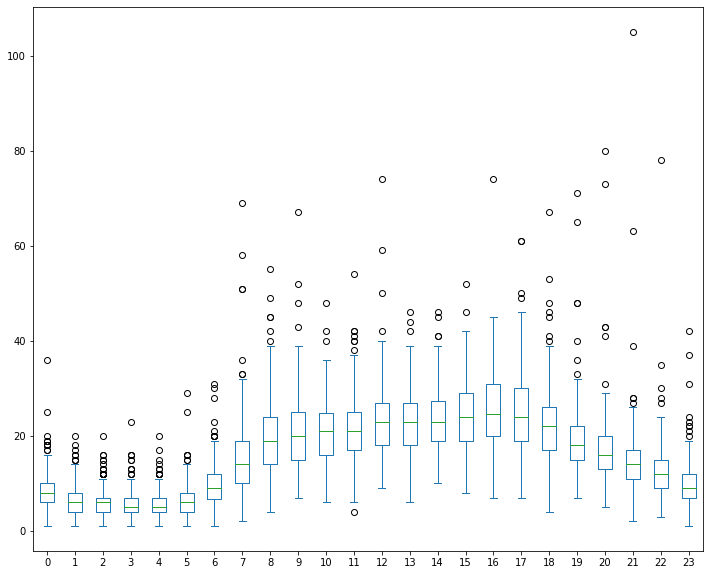

In [94]:
CALLS.plot.box(figsize=(12,10))
plt.xlabel = 'Hour'
plt.ylabel = 'No of Calls'
plt.show()

In [95]:
median_calls_per_hour = CALLS.median().reset_index()

In [96]:
median_calls_per_hour

,hour,0
0,0,8.0
1,1,6.0
2,2,6.0
3,3,5.0
4,4,5.0
5,5,6.0
6,6,9.0
7,7,14.0
8,8,19.0
9,9,20.0


In [97]:
median_calls_per_hour.rename(columns={0:'num_of_calls'}, inplace=True)

In [98]:
median_calls_per_hour

,hour,num_of_calls
0,0,8.0
1,1,6.0
2,2,6.0
3,3,5.0
4,4,5.0
5,5,6.0
6,6,9.0
7,7,14.0
8,8,19.0
9,9,20.0


<AxesSubplot:xlabel='hour', ylabel='num_of_calls'>

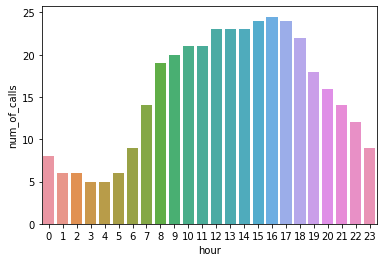

In [99]:
sns.barplot(data=median_calls_per_hour, x='hour', y='num_of_calls')

In [100]:
CALLS = CALLS.fillna(0)

In [101]:
CALLS

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
d-m-y,,,,,,,,,,,,,,,,,,,,,
1-1-2016,18.0,9.0,16.0,4.0,5.0,4.0,5.0,8.0,8.0,7.0,...,16.0,12.0,7.0,18.0,16.0,16.0,9.0,10.0,9.0,12.0
1-2-2016,6.0,4.0,3.0,4.0,5.0,16.0,10.0,22.0,25.0,23.0,...,23.0,18.0,18.0,28.0,28.0,20.0,11.0,15.0,9.0,12.0
1-3-2016,5.0,5.0,2.0,1.0,3.0,6.0,12.0,16.0,27.0,19.0,...,23.0,32.0,32.0,27.0,22.0,13.0,14.0,12.0,13.0,6.0
1-4-2016,14.0,6.0,4.0,8.0,5.0,12.0,12.0,26.0,17.0,13.0,...,26.0,30.0,39.0,37.0,28.0,33.0,27.0,17.0,9.0,12.0
1-5-2016,11.0,5.0,11.0,7.0,4.0,8.0,6.0,6.0,10.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9-4-2016,6.0,4.0,12.0,7.0,6.0,5.0,4.0,7.0,6.0,13.0,...,23.0,28.0,18.0,16.0,17.0,9.0,11.0,12.0,7.0,2.0
9-5-2016,3.0,11.0,5.0,3.0,4.0,7.0,7.0,25.0,15.0,25.0,...,15.0,17.0,29.0,20.0,22.0,16.0,16.0,14.0,7.0,10.0
9-6-2016,6.0,6.0,4.0,5.0,4.0,7.0,12.0,26.0,24.0,13.0,...,34.0,25.0,38.0,40.0,28.0,14.0,5.0,18.0,7.0,10.0


Inferences till no

Data is non-negative
data is discrete
data is independent
calls are coming at constant rate (medians of calls at particular hour)

Poisson Distribution

In [102]:
poisson_distribution_hour_wise = {}

In [103]:
for row in median_calls_per_hour.iterrows():
    #print(int(row[1]['hour']))
    poisson_distribution_hour_wise[int(row[1]['hour'])] = stats.poisson(mu=row[1]['num_of_calls'])

In [104]:
print(poisson_distribution_hour_wise)

{0: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA1D8EE0>, 1: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA1DBCD0>, 2: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA6496F0>, 3: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA342020>, 4: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA341D80>, 5: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA949930>, 6: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA949C60>, 7: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA9490F0>, 8: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA94A0B0>, 9: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA948100>, 10: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA94A2F0>, 11: <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000135DA949870>, 12: <scipy.stats._distn_infrastructure.rv_frozen 

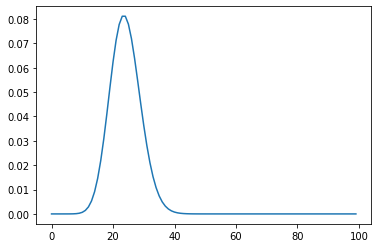

In [105]:
plt.plot(poisson_distribution_hour_wise[17].pmf(np.arange(0,100)))
plt.x_label='number of calls'
plt.show()

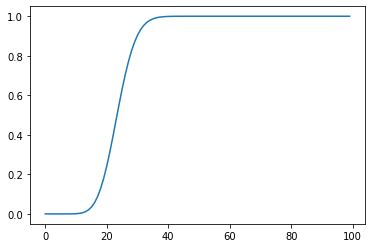

In [106]:
plt.plot(poisson_distribution_hour_wise[17].cdf(np.arange(0,100)))

required confidence = 99.99%

In [107]:
#calculation percent point function (ppf) for each hour
for hour in poisson_distribution_hour_wise:
    #print(hour)
    print("At {} hour, Probability that less than {} calls will arrive is 99.99%".format(hour, poisson_distribution_hour_wise[hour].ppf(0.9999)))
    #print("At {} hour, Probability that less than {} calls will arrive is 99.99%".format(hour, hour))

At 0 hour, Probability that less than 20.0 calls will arrive is 99.99%
At 1 hour, Probability that less than 17.0 calls will arrive is 99.99%
At 2 hour, Probability that less than 17.0 calls will arrive is 99.99%
At 3 hour, Probability that less than 15.0 calls will arrive is 99.99%
At 4 hour, Probability that less than 15.0 calls will arrive is 99.99%
At 5 hour, Probability that less than 17.0 calls will arrive is 99.99%
At 6 hour, Probability that less than 22.0 calls will arrive is 99.99%
At 7 hour, Probability that less than 30.0 calls will arrive is 99.99%
At 8 hour, Probability that less than 37.0 calls will arrive is 99.99%
At 9 hour, Probability that less than 39.0 calls will arrive is 99.99%
At 10 hour, Probability that less than 40.0 calls will arrive is 99.99%
At 11 hour, Probability that less than 40.0 calls will arrive is 99.99%
At 12 hour, Probability that less than 43.0 calls will arrive is 99.99%
At 13 hour, Probability that less than 43.0 calls will arrive is 99.99%
At

In [108]:
for hour in poisson_distribution_hour_wise:
    print("At {} hour, number of staff required is {}".format(hour, np.ceil(poisson_distribution_hour_wise[hour].ppf(0.9999)/10)))

At 0 hour, number of staff required is 2.0
At 1 hour, number of staff required is 2.0
At 2 hour, number of staff required is 2.0
At 3 hour, number of staff required is 2.0
At 4 hour, number of staff required is 2.0
At 5 hour, number of staff required is 2.0
At 6 hour, number of staff required is 3.0
At 7 hour, number of staff required is 3.0
At 8 hour, number of staff required is 4.0
At 9 hour, number of staff required is 4.0
At 10 hour, number of staff required is 4.0
At 11 hour, number of staff required is 4.0
At 12 hour, number of staff required is 5.0
At 13 hour, number of staff required is 5.0
At 14 hour, number of staff required is 5.0
At 15 hour, number of staff required is 5.0
At 16 hour, number of staff required is 5.0
At 17 hour, number of staff required is 5.0
At 18 hour, number of staff required is 5.0
At 19 hour, number of staff required is 4.0
At 20 hour, number of staff required is 4.0
At 21 hour, number of staff required is 3.0
At 22 hour, number of staff required is 3.